In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the CSV file
file_path = 'social_media_data.csv'
social_media_data = pd.read_csv(file_path)

In [6]:
# Clean the data
social_media_data['date'] = pd.to_datetime(social_media_data['date'])
social_media_data['likes'] = pd.to_numeric(social_media_data['likes'], errors='coerce')
social_media_data['shares'] = pd.to_numeric(social_media_data['shares'], errors='coerce')
social_media_data['comments'] = pd.to_numeric(social_media_data['comments'], errors='coerce')
social_media_data['views'] = pd.to_numeric(social_media_data['views'], errors='coerce')
social_media_data = social_media_data.dropna()

In [8]:
# Add engagement column
social_media_data['engagement'] = social_media_data['likes'] + social_media_data['shares'] + social_media_data['comments']

In [10]:
# Question 1: Total Metrics
total_likes = social_media_data['likes'].sum()
total_shares = social_media_data['shares'].sum()
total_comments = social_media_data['comments'].sum()
total_views_videos = social_media_data[social_media_data['post_type'] == 'video']['views'].sum()

# Question 2: Platform with Highest Engagement
highest_engagement_platform = social_media_data.groupby('platform')['engagement'].sum().idxmax()
highest_engagement_value = social_media_data.groupby('platform')['engagement'].sum().max()

# Question 3: Average Metrics by Platform
average_metrics_by_platform = social_media_data.groupby('platform')[['likes', 'shares', 'comments', 'views']].mean()

# Question 4: Total Posts by Type and Platform
post_count_by_platform_and_type = social_media_data.groupby(['platform', 'post_type']).size().unstack(fill_value=0)

# Question 5: Post Type with Highest Engagement
average_engagement_by_post_type = social_media_data.groupby('post_type')['engagement'].mean()
highest_engagement_post_type = average_engagement_by_post_type.idxmax()
highest_engagement_post_type_value = average_engagement_by_post_type.max()

# Question 6: Quarterly Engagement
social_media_data['quarter'] = social_media_data['date'].dt.quarter
quarterly_engagement = social_media_data.groupby('quarter')['engagement'].sum()



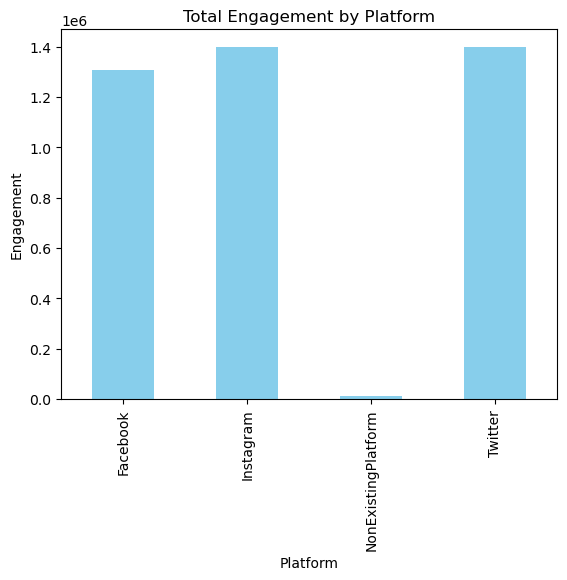

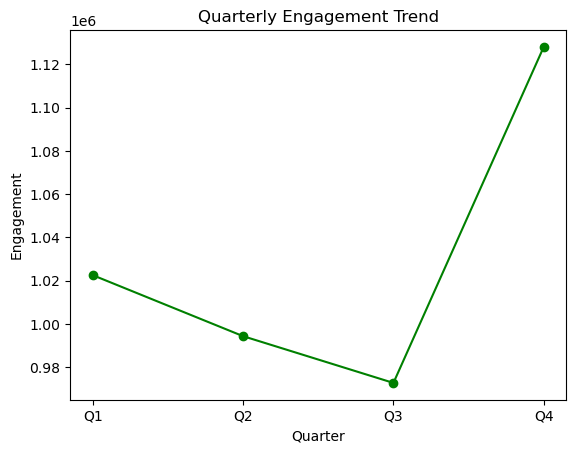

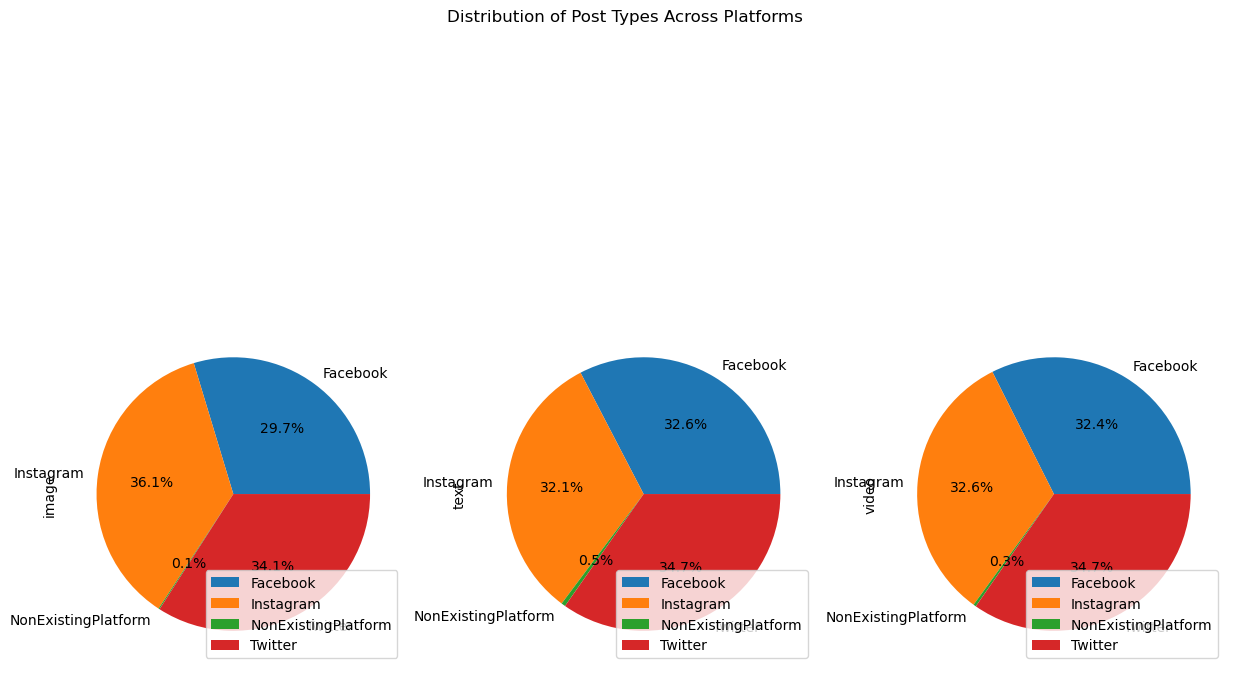

In [12]:
# Visualizations
# 1. Bar Chart: Total Engagement by Platform
social_media_data.groupby('platform')['engagement'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Engagement by Platform')
plt.xlabel('Platform')
plt.ylabel('Engagement')
plt.show()

# 2. Line Chart: Quarterly Engagement Trend
quarterly_engagement.plot(kind='line', marker='o', color='green')
plt.title('Quarterly Engagement Trend')
plt.xlabel('Quarter')
plt.ylabel('Engagement')
plt.xticks(quarterly_engagement.index, [f"Q{q}" for q in quarterly_engagement.index])
plt.show()

# 3. Pie Chart: Distribution of Post Types Across Platforms
post_count_by_platform_and_type.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(15, 10))
plt.suptitle('Distribution of Post Types Across Platforms')
plt.show()